In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 1.615334615
Epoch: 0002, Cost: 0.707553983
Epoch: 0003, Cost: 0.579051181
Epoch: 0004, Cost: 0.515355635
Epoch: 0005, Cost: 0.474532608
Epoch: 0006, Cost: 0.444963965
Epoch: 0007, Cost: 0.423049518
Epoch: 0008, Cost: 0.406028696
Epoch: 0009, Cost: 0.391955824
Epoch: 0010, Cost: 0.379622545
Epoch: 0011, Cost: 0.369061706
Epoch: 0012, Cost: 0.359804755
Epoch: 0013, Cost: 0.352986111
Epoch: 0014, Cost: 0.345162593
Epoch: 0015, Cost: 0.338961330
Epoch: 0016, Cost: 0.333223930
Epoch: 0017, Cost: 0.328634495
Epoch: 0018, Cost: 0.324044598
Epoch: 0019, Cost: 0.320443495
Epoch: 0020, Cost: 0.316046781
Epoch: 0021, Cost: 0.312769480
Epoch: 0022, Cost: 0.309273112
Epoch: 0023, Cost: 0.306242444
Epoch: 0024, Cost: 0.303048058
Epoch: 0025, Cost: 0.301035902
Epoch: 0026, Cost: 0.297826506


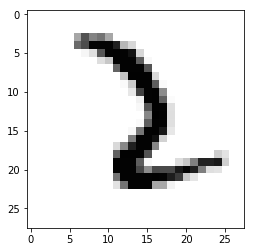

In [10]:
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.35).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
num_epochs = 90
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")
    # Test the model using test sets
    print("Accuracy: ",accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}),) 
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print("Prediction: ",sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),)

    plt.imshow(mnist.test.images[r : r + 1].reshape(28, 28),cmap="Greys",interpolation="nearest",)
    plt.show()